<a href="https://colab.research.google.com/github/Fatehbs/AI-applications/blob/main/2D_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
samples_df = pd.DataFrame(
    data = np.random.uniform(low = -1, high = 1, size = [100000, 2]),
    columns = ['x', 'y']
)

In [ ]:

samples_df.eval('prior_nll = 0', inplace = True)
for _ in range(1000):
    samples_df.eval('loss = (x**2 - y**2 - 0.25**2)**2', inplace = True)
    samples_df.eval('pred_posterior_nll = loss + prior_nll', inplace = True)
    samples_df.eval('posterior_w = exp(-pred_posterior_nll)', inplace = True)
    sum_posterior_w = samples_df['posterior_w'].sum()
    samples_df.eval('posterior_p =  posterior_w / @sum_posterior_w', inplace = True)
    samples_df.eval('posterior_nll = -log(1.0e-6 + posterior_p)', inplace = True)
    samples_df.eval('prior_nll = posterior_nll', inplace = True)


In [ ]:
sorted_samples_df = samples_df.sort_values('x').reset_index(drop = True).copy()

In [ ]:
sorted_samples_df['posterior_q'] = np.cumsum(samples_df['posterior_p'])

In [ ]:
sorted_samples_df = sorted_samples_df.query('posterior_q <= 0.95 & posterior_q >= 0.05')

In [ ]:
sorted_samples_df.eval('quartile_x = floor(posterior_q / 0.25)', inplace = True)

In [ ]:
cond_dist = {}

In [ ]:
sorted_quartile_1 = sorted_samples_df.query('quartile_x == 0').sort_values('y')
sorted_quartile_2 = sorted_samples_df.query('quartile_x == 1').sort_values('y')
sorted_quartile_3 = sorted_samples_df.query('quartile_x == 2').sort_values('y')
sorted_quartile_4 = sorted_samples_df.query('quartile_x == 3').sort_values('y')

In [ ]:
sum_posteror_w = sorted_quartile_1['posterior_w'].sum()
sorted_quartile_1.eval('posterior_p = posterior_w / @sum_posteror_w', inplace = True)
sorted_quartile_1['posterior_q'] = np.cumsum(sorted_quartile_1['posterior_p'])
sorted_quartile_1 = sorted_quartile_1.query('posterior_q <= 0.95 & posterior_q >= 0.05')

In [ ]:
min = sorted_quartile_1['y'].min()
q1 = sorted_quartile_1.query('posterior_q <= 0.25')['y'].max()
med = sorted_quartile_1.query('posterior_q <= 0.5')['y'].max()
q3 = sorted_quartile_1.query('posterior_q <= 0.75')['y'].max()
max = sorted_quartile_1['y'].max()

cond_dist['x_q1'] = [min, q1, med, q3, max]

In [ ]:
sum_posteror_w = sorted_quartile_2['posterior_w'].sum()
sorted_quartile_2.eval('posterior_p = posterior_w / @sum_posteror_w', inplace = True)
sorted_quartile_2['posterior_q'] = np.cumsum(sorted_quartile_2['posterior_p'])
sorted_quartile_2 = sorted_quartile_2.query('posterior_q <= 0.95 & posterior_q >= 0.05')

In [ ]:
min = sorted_quartile_2['y'].min()
q1 = sorted_quartile_2.query('posterior_q <= 0.25')['y'].max()
med = sorted_quartile_2.query('posterior_q <= 0.5')['y'].max()
q3 = sorted_quartile_2.query('posterior_q <= 0.75')['y'].max()
max = sorted_quartile_2['y'].max()

cond_dist['x_q2'] = [min, q1, med, q3, max]

In [ ]:
sum_posteror_w = sorted_quartile_3['posterior_w'].sum()
sorted_quartile_3.eval('posterior_p = posterior_w / @sum_posteror_w', inplace = True)
sorted_quartile_3['posterior_q'] = np.cumsum(sorted_quartile_3['posterior_p'])
sorted_quartile_3 = sorted_quartile_3.query('posterior_q <= 0.95 & posterior_q >= 0.05')

In [ ]:
min = sorted_quartile_3['y'].min()
q1 = sorted_quartile_3.query('posterior_q <= 0.25')['y'].max()
med = sorted_quartile_3.query('posterior_q <= 0.5')['y'].max()
q3 = sorted_quartile_3.query('posterior_q <= 0.75')['y'].max()
max = sorted_quartile_3['y'].max()

cond_dist['x_q3'] = [min, q1, med, q3, max]

In [ ]:
sum_posteror_w = sorted_quartile_4['posterior_w'].sum()
sorted_quartile_4.eval('posterior_p = posterior_w / @sum_posteror_w', inplace = True)
sorted_quartile_4['posterior_q'] = np.cumsum(sorted_quartile_4['posterior_p'])
sorted_quartile_4 = sorted_quartile_4.query('posterior_q <= 0.95 & posterior_q >= 0.05')

In [ ]:
min = sorted_quartile_4['y'].min()
q1 = sorted_quartile_4.query('posterior_q <= 0.25')['y'].max()
med = sorted_quartile_4.query('posterior_q <= 0.5')['y'].max()
q3 = sorted_quartile_4.query('posterior_q <= 0.75')['y'].max()
max = sorted_quartile_4['y'].max()

cond_dist['x_q4'] = [min, q1, med, q3, max]

In [ ]:
quartiles_df = pd.DataFrame(cond_dist)

<Axes: >

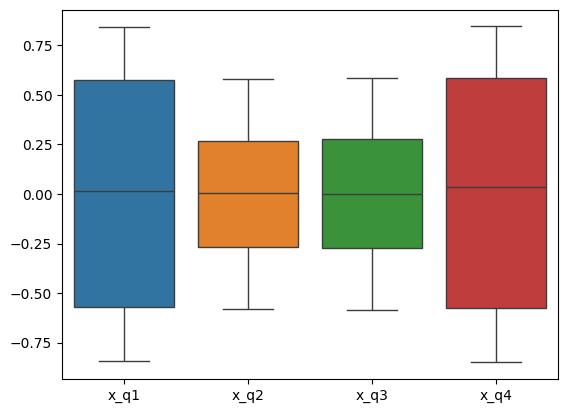

In [ ]:
sns.boxplot(quartiles_df)

<Axes: xlabel='x', ylabel='y'>

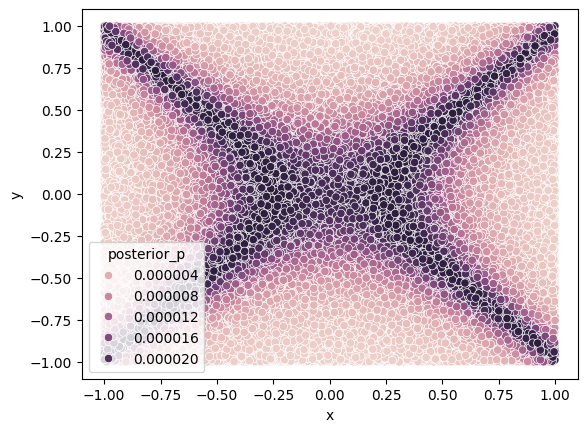

In [ ]:
sns.scatterplot(x = 'x', y = 'y', hue = 'posterior_p', data = samples_df)